In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize': (15, 8)})
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('datasets/reddit_comments_cleaned.csv')
df

,Post_Id,Subreddit,Post_Title,Post_Body,Comment,Upvotes,Comment_Created,Flair
0,14oh8jm,mentalhealth,Could you share some music (preferably instrum...,"\r \n Hi, I have a history of trauma and PTSD...",It's not instrumental but the kooks inside in/...,1,2023-07-02 03:01:19,Question
1,14ogtgq,mentalhealth,Just looking for some constructive help,Just looking for an opinion.\n\nM 33. Ok so af...,Most likely if you're drinking while taking yo...,2,2023-07-02 02:28:38,Need Support
2,14ogtgq,mentalhealth,Just looking for some constructive help,Just looking for an opinion.\n\nM 33. Ok so af...,It's rough. I'm about 2 weeks into Fluoxetine ...,1,2023-07-02 02:42:23,Need Support
3,14ogoxs,mentalhealth,My hot take on self diagnosis,I know some people don’t have access to health...,Diagnosing yourself is not fine. Even doctors/...,3,2023-07-02 02:32:49,no_flair
4,14ogoxs,mentalhealth,My hot take on self diagnosis,I know some people don’t have access to health...,Obviously it's okay to think you might have a ...,2,2023-07-02 03:10:49,no_flair
...,...,...,...,...,...,...,...,...
9646,blgbmk,AdultDepression,Bad News Anxiety,I know I'm not the only one who experiences th...,Brene Brown has some really good research on t...,3,2019-05-06 21:57:51,no_flair
9647,bl8sx2,AdultDepression,Waking up everyday,I don’t want to wake up. \n\nSometimes I’d hav...,We got this. One day at a time.,11,2019-05-06 04:23:06,Rant
9648,bl8sx2,AdultDepression,Waking up everyday,I don’t want to wake up. \n\nSometimes I’d hav...,I try to go to bed a little hungry and then al...,8,2019-05-06 06:46:59,Rant
9649,bl8sx2,AdultDepression,Waking up everyday,I don’t want to wake up. \n\nSometimes I’d hav...,I feel you! I often just sob. Someone sugges...,5,2019-05-06 07:50:51,Rant


In [3]:
# Summary statistics of numerical columns
df.describe()

,Upvotes
count,9651.000000
mean,4.126101
std,7.878070
min,-23.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,248.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Post_Id          9651 non-null   object
 1   Subreddit        9651 non-null   object
 2   Post_Title       9651 non-null   object
 3   Post_Body        9651 non-null   object
 4   Comment          9651 non-null   object
 5   Upvotes          9651 non-null   int64 
 6   Comment_Created  9651 non-null   object
 7   Flair            9651 non-null   object
dtypes: int64(1), object(7)
memory usage: 603.3+ KB


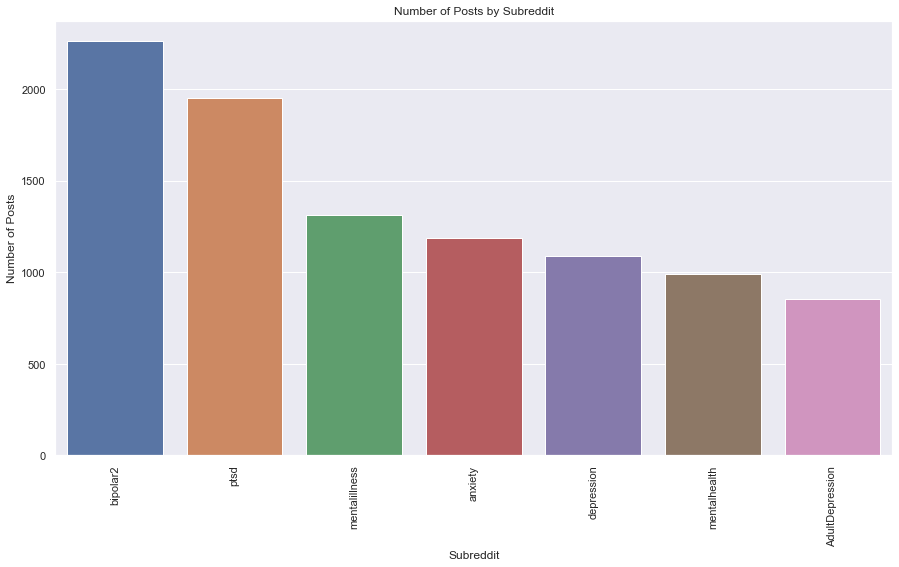

In [5]:
# Distribution of posts in the subreddits

subreddit_counts = df['Subreddit'].value_counts()
sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.title('Number of Posts by Subreddit')

plt.show()

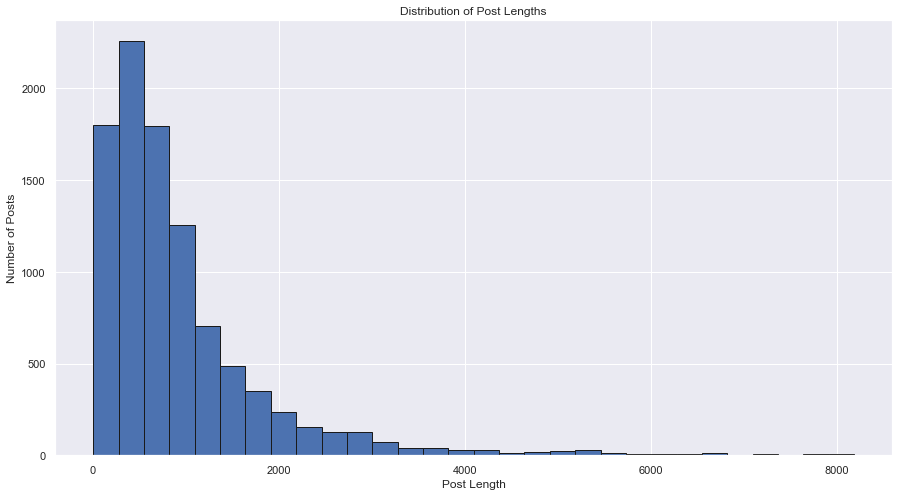

In [6]:
# Compute the length of each post
df['Post_Length'] = df['Post_Body'].str.len()

# Plot the histogram
plt.hist(df['Post_Length'], bins=30, edgecolor='k')
plt.xlabel('Post Length')
plt.ylabel('Number of Posts')
plt.title('Distribution of Post Lengths')
plt.show()

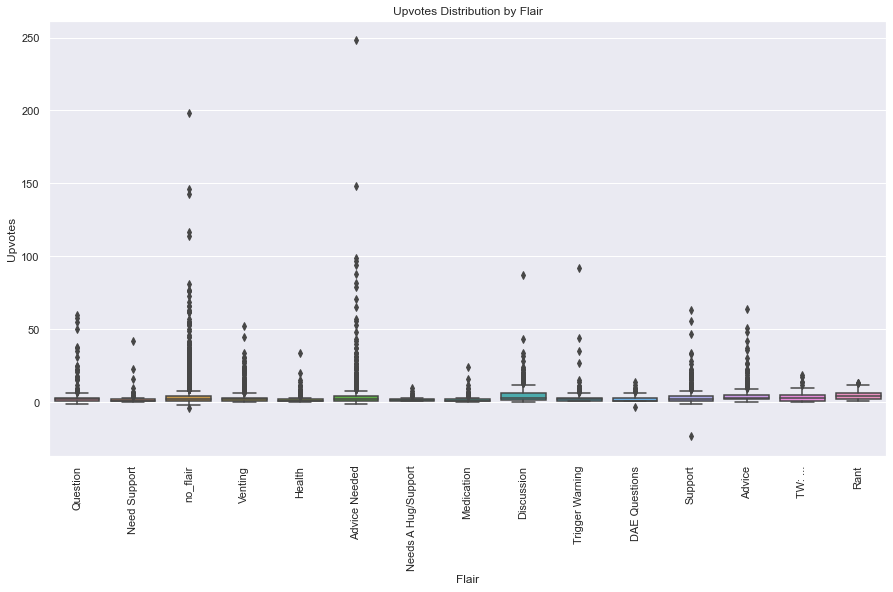

In [7]:
# boxplot for upvotes by flair
sns.boxplot(data=df, x='Flair', y='Upvotes')
plt.xticks(rotation=90)
plt.xlabel('Flair')
plt.ylabel('Upvotes')
plt.title('Upvotes Distribution by Flair')

plt.show()

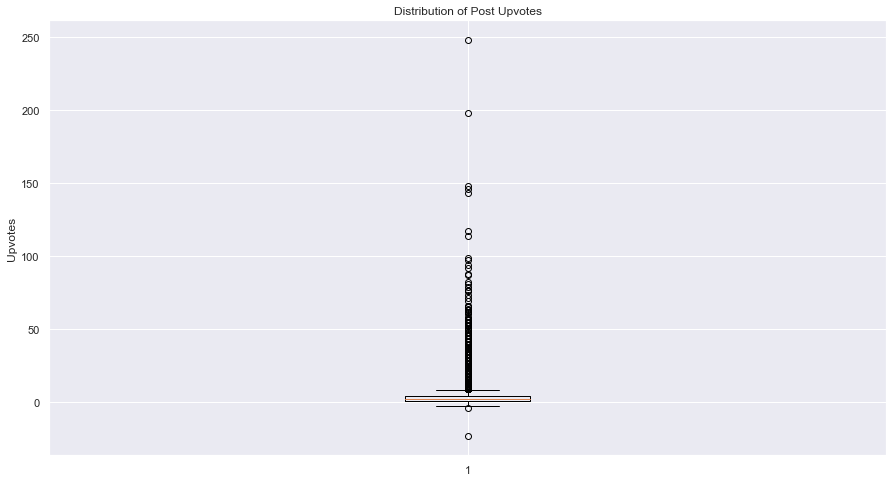

In [8]:
plt.boxplot(df["Upvotes"])
plt.ylabel("Upvotes")
plt.title("Distribution of Post Upvotes")
plt.show()

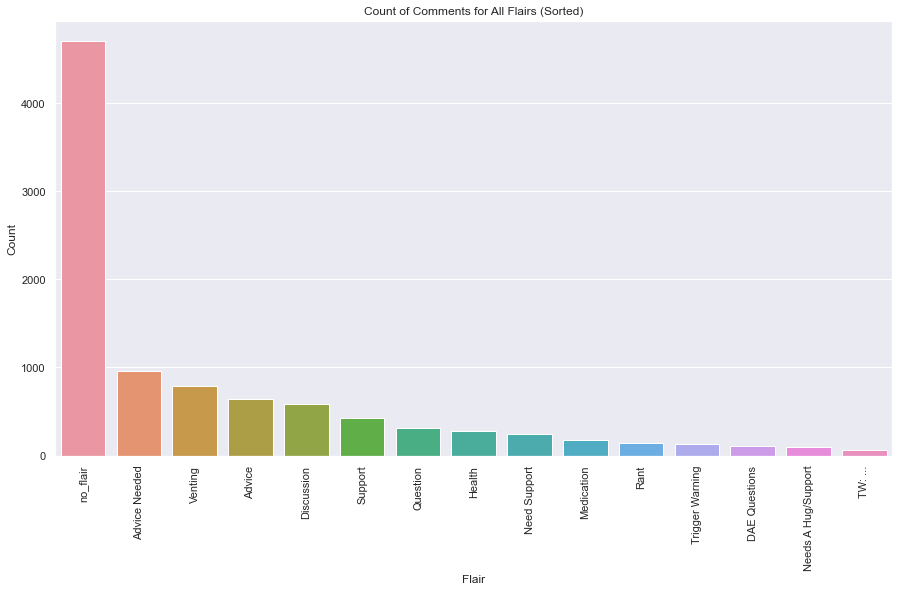

In [9]:
flair_counts = df['Flair'].value_counts().sort_values(ascending=False)
sns.countplot(x='Flair', data=df, order=flair_counts.index)
plt.title('Count of Comments for All Flairs (Sorted)')
plt.xlabel('Flair')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

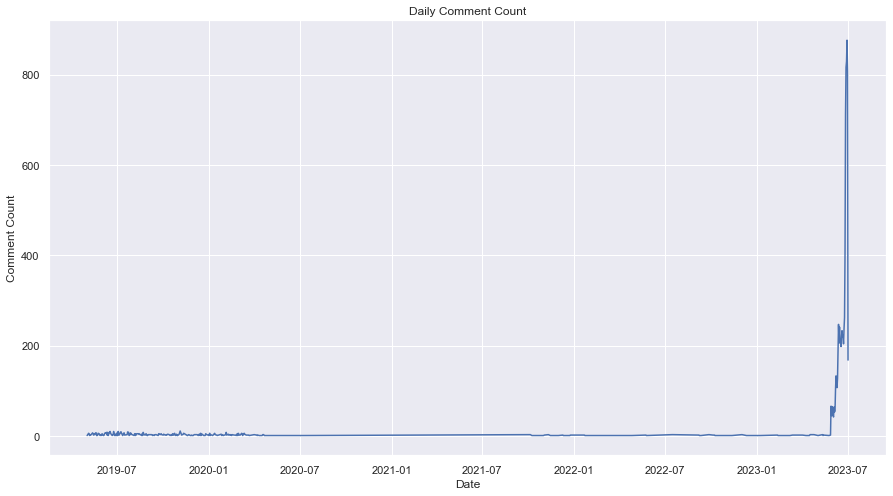

In [10]:
# Convert 'Comment_Created' column to datetime with specified format
df['Comment_Created'] = pd.to_datetime(df['Comment_Created'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
# Group by date and count the number of comments
daily_comment_count = df.groupby(df['Comment_Created'].dt.date).size()

# Create a line plot of daily comment count
sns.lineplot(data=daily_comment_count)
plt.xlabel('Date')
plt.ylabel('Comment Count')
plt.title('Daily Comment Count')

plt.show()

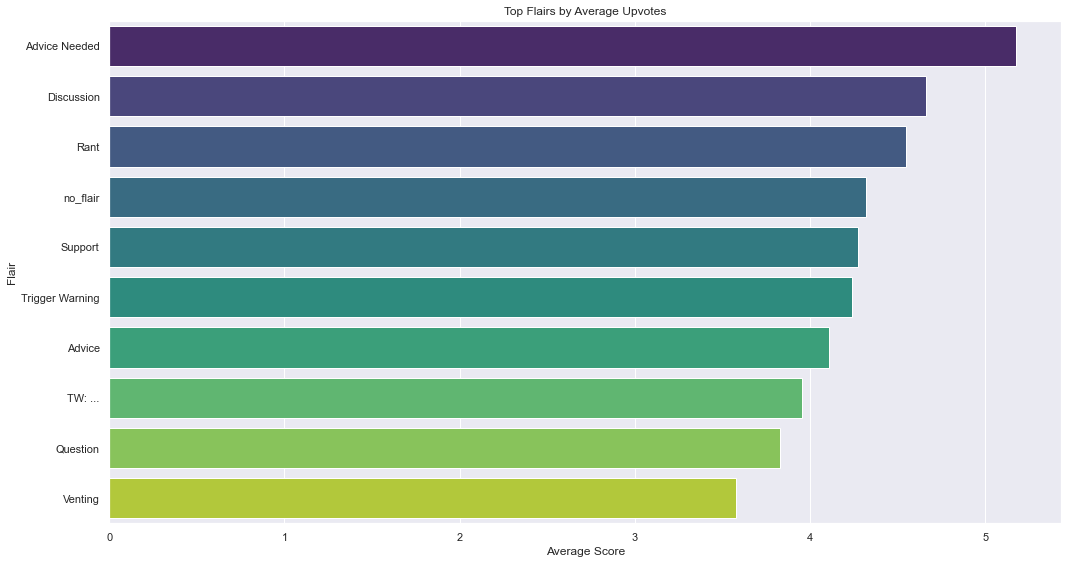

In [11]:
# Compute the average score for each flair
average_score_by_flair = df.groupby('Flair')['Upvotes'].mean().nlargest(10)

sns.barplot(x=average_score_by_flair.values, y=average_score_by_flair.index, palette='viridis')
plt.xlabel('Average Score')
plt.ylabel('Flair')
plt.title('Top Flairs by Average Upvotes')
plt.tight_layout()
plt.show()

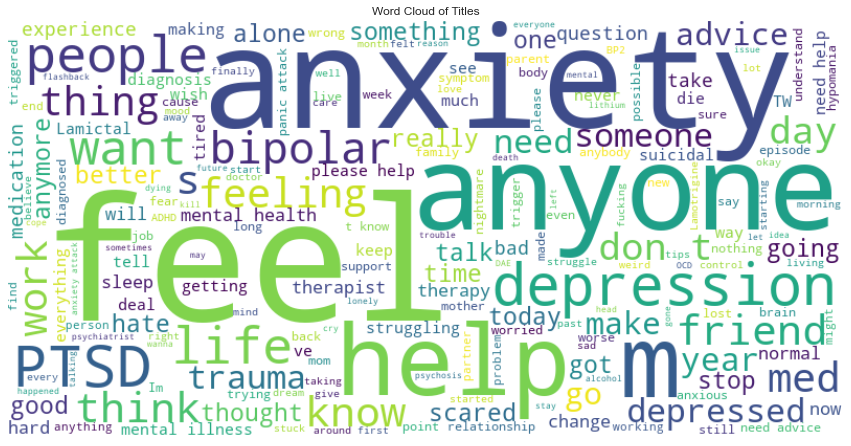

In [12]:
# Word Cloud of Titles

# Combine all titles into a single string
titles = ' '.join(df['Post_Title'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

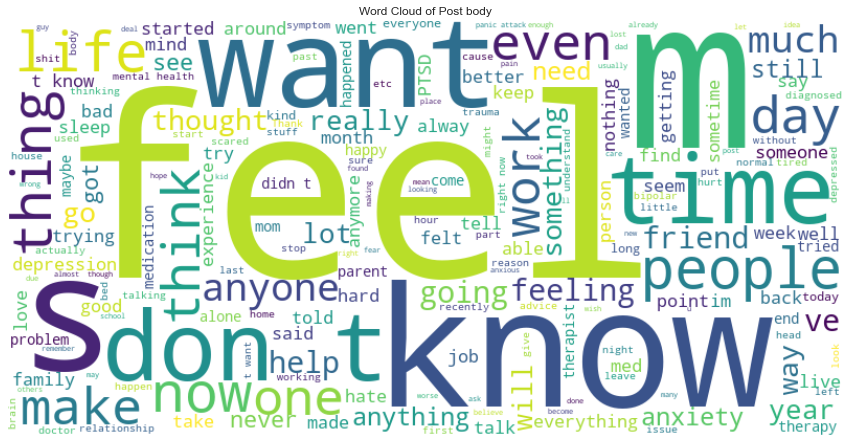

In [13]:
# Word Cloud of Post body

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Post_Body']))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Post body')
plt.show()